In [7]:
#import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression #used to make the model
from sklearn.model_selection import train_test_split #used to split the dataset into training and testing
import seaborn as sns #visualisation
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("Medicalpremium.csv")
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


<Axes: >

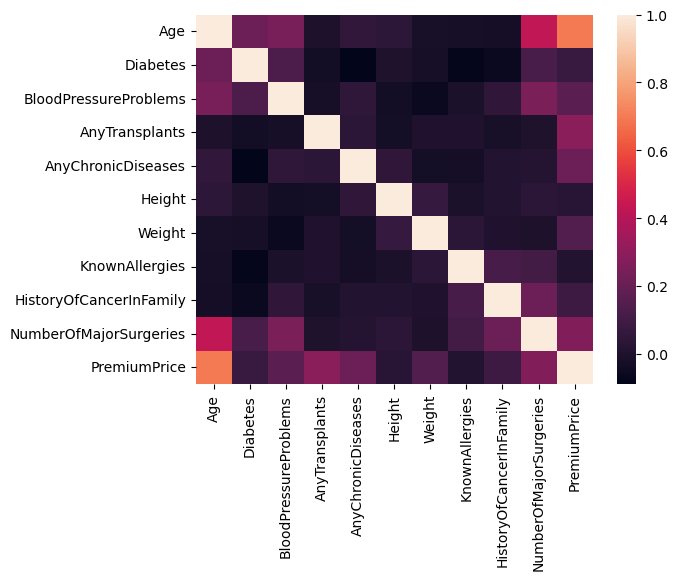

In [12]:
sns.heatmap(df.corr())

In [37]:
x_inputs = df.iloc[:,:10]

y_target = df.iloc[:,10]


In [38]:
x_train_data,x_test_data,y_train_data,y_test_data =  train_test_split(x_inputs,y_target,test_size=0.20)

In [39]:
x_train_data.shape

(788, 10)

In [40]:
y_train_data.shape

(788,)

In [41]:
x_test_data.shape

(198, 10)

In [42]:
y_test_data.shape

(198,)

In [43]:
L_model = LinearRegression()

In [44]:
L_model.fit(x_train_data,y_train_data)

LinearRegression()

In [45]:
y_prediction = L_model.predict(x_test_data)

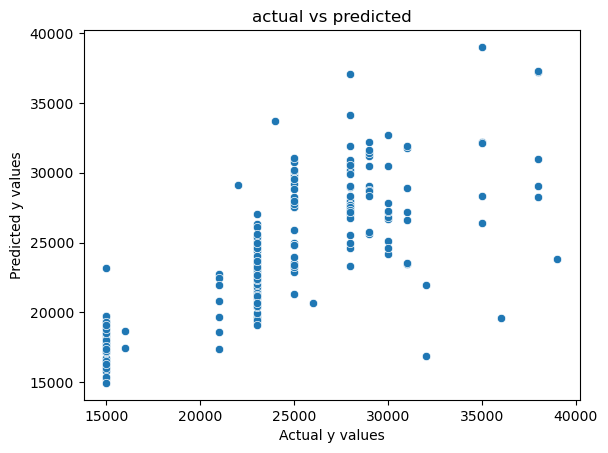

In [46]:
ax = sns.scatterplot(x=y_test_data,y = y_prediction, marker='o')

#specfiy axis labels
ax.set(xlabel='Actual y values',ylabel='Predicted y values', title='actual vs predicted')

#display plot
plt.show()


In [47]:
y_prediction.shape

(198,)

In [48]:
from sklearn.metrics import r2_score,mean_squared_error

In [49]:
r2_score(y_test_data,y_prediction)

0.585916799475334

In [50]:
L_model.coef_

array([ 339.3740585 , -512.43078049,   92.63555129, 7851.65060738,
       2596.21295318,  -18.26035682,   70.08502857,  247.69890012,
       2195.35830642, -651.23808843])

In [51]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [52]:
# the y intercept is the c in the linear equation
L_model.intercept_

7256.651299325018

In [55]:
random_sample = pd.DataFrame({'Age':[45], 'Diabetes':[0], 'BloodPressureProblems':[0], 'AnyTransplants':[0],
       'AnyChronicDiseases':[0], 'Height':[155], 'Weight':[57], 'KnownAllergies':[0], 'HistoryOfCancerInFamily':[0], 'NumberOfMajorSurgeries':[0]})

In [56]:
L_model.predict(random_sample)

array([23692.97525351])